In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [3]:
data = pd.read_csv('diabetes_012_health_indicators.csv')


In [5]:
data = data.dropna()  # Dropping rows with missing values
X = data.drop(columns=['Diabetes_012'])  # Features (Drop the target column)
y = data['Diabetes_012']  # Target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [11]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the Logistic Regression model:", accuracy)



Accuracy of the Logistic Regression model: 0.8482537054556922


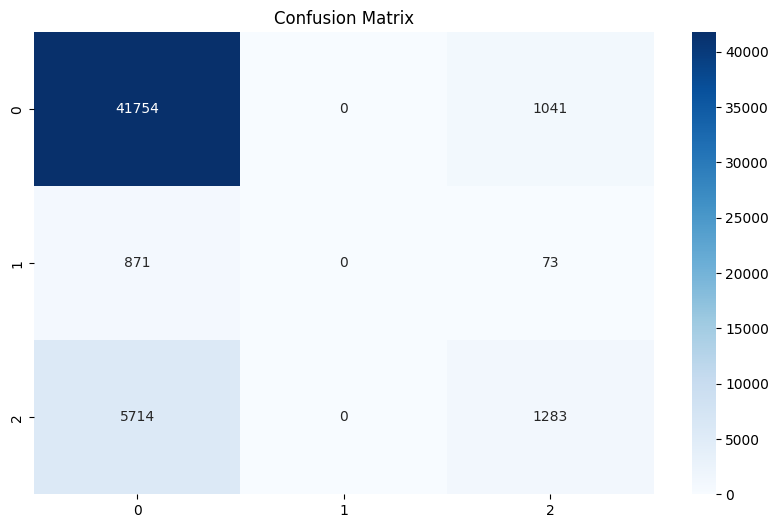

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

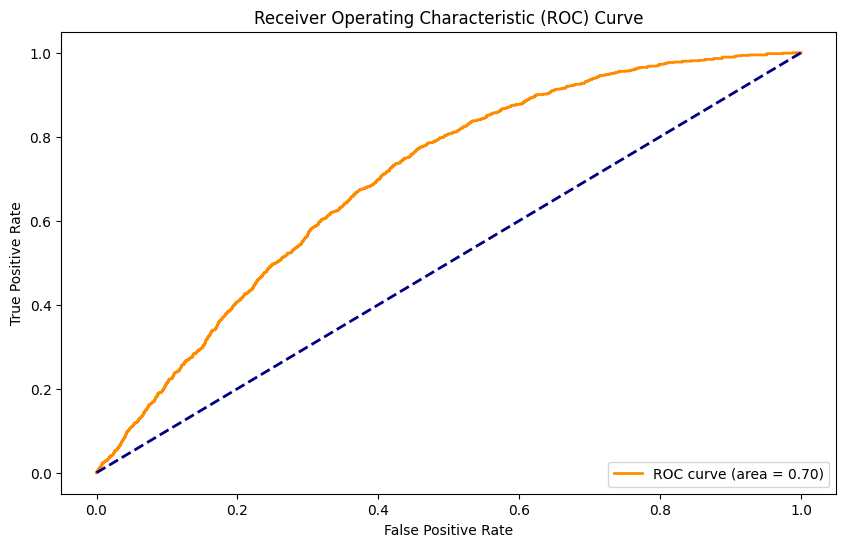

In [15]:
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [19]:
all_features = list(X.columns)
user_input = {feature: 0 for feature in all_features}

user_input.update({
    'Age': float(input("Enter Age: ")),
    'BMI': float(input("Enter BMI: ")),
    'HighBP': int(input("Enter High Blood Pressure (1 for Yes, 0 for No): ")),
    'HighChol': int(input("Enter High Cholesterol (1 for Yes, 0 for No): ")),
    'CholCheck': int(input("Enter Cholesterol Check (1 for Yes, 0 for No): ")),
    'Smoker': int(input("Enter Smoker (1 for Yes, 0 for No): ")),
    'Stroke': int(input("Enter Stroke History (1 for Yes, 0 for No): ")),
    'HeartDiseaseorAttack': int(input("Enter History of Heart Disease/Attack (1 for Yes, 0 for No): ")),
    'PhysActivity': int(input("Enter Physical Activity (1 for Yes, 0 for No): ")),
    'Fruits': int(input("Consumes Fruits Regularly (1 for Yes, 0 for No): ")),
    'Veggies': int(input("Consumes Vegetables Regularly (1 for Yes, 0 for No): "))
})

user_df = pd.DataFrame([user_input])[all_features]
user_df_scaled = scaler.transform(user_df)
disease_prediction = model.predict(user_df_scaled)

print("\nPrediction for the given patient details:\n")
if disease_prediction[0] == 0:
    print("The patient is not at risk of disease.")
elif disease_prediction[0] == 1:
    print("The patient is at mild risk of diabetes.")
else:
    print("The patient is at severe risk of diabetes.")

Enter Age:  21
Enter BMI:  25
Enter High Blood Pressure (1 for Yes, 0 for No):  0
Enter High Cholesterol (1 for Yes, 0 for No):  0
Enter Cholesterol Check (1 for Yes, 0 for No):  1
Enter Smoker (1 for Yes, 0 for No):  0
Enter Stroke History (1 for Yes, 0 for No):  0
Enter History of Heart Disease/Attack (1 for Yes, 0 for No):  0
Enter Physical Activity (1 for Yes, 0 for No):  1
Consumes Fruits Regularly (1 for Yes, 0 for No):  1
Consumes Vegetables Regularly (1 for Yes, 0 for No):  1



Prediction for the given patient details:

The patient is not at risk of disease.
